# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

df = pd.read_csv('data/human_body_temperature.csv')

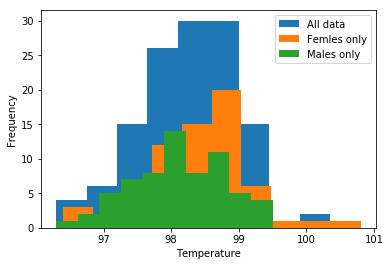

There is 130 total data points.
65 of which are male.
65 of which are female.


In [2]:
# 1.) Is the distribution of body temperatures normal?: slight right skew, it is about normal
# 2.) Is the sample size large? Are the observations independent?
all_data = plt.hist(df['temperature'], bins=10, label='All data')


#what about different genders
males = df.loc[ df['gender'] == 'M' ]
females = df.loc[ df['gender'] == 'F' ]
females_only = plt.hist(females['temperature'], bins=10, label='Femles only')
males_only = plt.hist(males['temperature'], bins=10, label='Males only')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()
plt.show()
print("There is " + str(len(df)) + " total data points.")
print(str(len(males)) + " of which are male.")
print(str(len(females)) + " of which are female.")

The data is slightly skewed to the right, but looks normal enough to suffice the central limit theorem. There are 130 total data points, half of of which is male and the other half is female, which satifies the sample size condition for the central limit theorem (at least 30 data points). Since the data doesn't show and strong bias, it is safe to assume that the data values are independent.

In [3]:
# 3.) Is the true population mean really 98.6 degrees F?

print("Null Hypothesis: The mean body temperature of the population is 98.6 degrees F.")
print("Alternative Hypothesis: The mean body temperature is not 98.6 degrees F.")
print("The population body temperature mean is " + str(np.mean(df['temperature'])) )
print("The mean body temperature for men is " + str(np.mean(males['temperature'])) )
print("The mean body temperature for women is " + str(np.mean(females['temperature'])) )

Null Hypothesis: The mean body temperature of the population is 98.6 degrees F.
Alternative Hypothesis: The mean body temperature is not 98.6 degrees F.
The population body temperature mean is 98.24923076923078
The mean body temperature for men is 98.1046153846154
The mean body temperature for women is 98.39384615384613


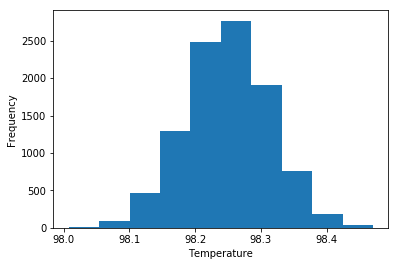

p-value = 0.0
Z-Score = 62.49151559653875


In [4]:
# Bootstrap hypothesis test

samples_statistics = np.empty(10000)

for i in range(10000):
    samples_statistics[i] = np.mean( np.random.choice( df['temperature'], size=len(df['temperature']) ) )
 
plt.hist(samples_statistics, bins=10)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()
print("p-value = " + str( (np.sum(samples_statistics >= 98.6))/(len(samples_statistics)) ) )

# Frequentist statistical testing
z_score = (98.6 - samples_statistics.mean())/(samples_statistics.std()/sqrt(130))
print("Z-Score = " + str(z_score))

Bootstrap hypothesis test shows that the mean body temperature is indeed NOT 98.6 degrees F.

A z-score of 62.71 definately corresponds to a 0 probability. I chose to do a z-statistic test since the curve is normal.

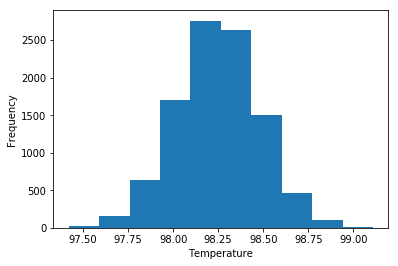

p-value from bootstrapping = 0.0633
Z-Score = 4.816076074440214
p-value from a z-score of 4.816076074440214 is: 1e-05


In [5]:
# 4.) Draw a small sample of size 10 from the data and repeat both frequentist tests.

samples_statistics_10 = np.empty(10000)

for i in range(10000):
    samples_statistics_10[i] = np.mean( np.random.choice( df['temperature'], size=10 ) )
 
plt.hist(samples_statistics_10, bins=10)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()
print("p-value from bootstrapping = " + str( (np.sum(samples_statistics_10 >= 98.6))/(len(samples_statistics_10)) ) )

z_score_10 = (98.6 - samples_statistics_10.mean())/(samples_statistics_10.std()/sqrt(10))
print("Z-Score = " + str(z_score_10))
print("p-value from a z-score of " + str(z_score_10) + " is: " + str(0.00001))

Whether I used a sample size of 10 or 130 I arrived at the same conclusion. I think a sample size of 10 is better bacause we see a better representation of all the values in the dataset. 

In [6]:
# 5.) At what temperature should we consider someone's temperature to be "abnormal"?

#samples_statistics_10.max()  #99.1099
#samples_statistics_10.min()  #97.3099999
#samples_statistics_10.std()   #0.2306
#samples_statistics_10.mean()   #98.253

#Anything outside of a 90% confidence interval I would consider as abnormal
confidence_interval = str(round(samples_statistics_10.mean()-2.055*samples_statistics_10.std(),2)) + '-' + str(round(samples_statistics_10.mean()+2.055*samples_statistics_10.std(),2))

A body temperature outside of 90% of all randomized values would be considered as abnormal: 97.78-98.73

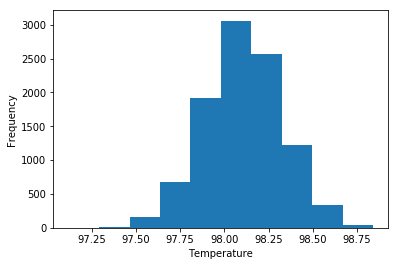

In [7]:
# 5.) Is there a significant difference between males and females in normal temperature?

# Male Data
samples_statistics_10_male = np.empty(10000)

for i in range(10000):
    samples_statistics_10_male[i] = np.mean( np.random.choice( males['temperature'], size=10 ) )
 
plt.hist(samples_statistics_10_male, bins=10)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

confidence_interval = str(round(samples_statistics_10_male.mean()-2.055*samples_statistics_10_male.std(),2)) + '-' + str(round(samples_statistics_10_male.mean()+2.055*samples_statistics_10_male.std(),2))

A body temperature outside of 90% of all randomized male temperature values would be considered as abnormal for men: 97.64-98.56

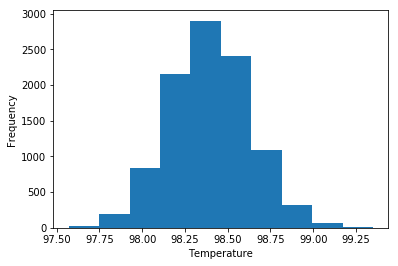

In [8]:
# Female Data
samples_statistics_10_female = np.empty(10000)

for i in range(10000):
    samples_statistics_10_female[i] = np.mean( np.random.choice( females['temperature'], size=10 ) )
 
plt.hist(samples_statistics_10_female, bins=10)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

confidence_interval = str(round(samples_statistics_10_female.mean()-2.055*samples_statistics_10_female.std(),2)) + '-' + str(round(samples_statistics_10_female.mean()+2.055*samples_statistics_10_female.std(),2))

A body temperature outside of 90% of all female temperature values would be considered as abnormal for women: 97.9-98.87

On average we see a 0.3 degree difference of what is normal between men and women. To test the significance of this we could do a test on the differences of temperatures from a random sample and see how many times we find a difference of 0.3. If we see a difference of 0.3 occur many times (greater than 0.05 chance), then it would be logical to conclude that there is NOT a significant difference in average body temperature between men and women. If we see a difference of 0.3 not occur many times (less than 0.05 chance) then we could conclude that there IS a significant difference between the body temperatures of men and women.

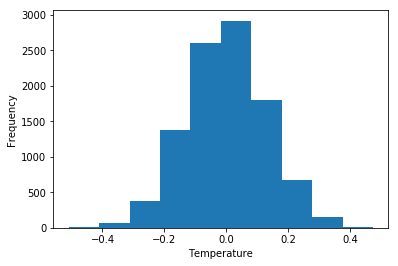

p-value from bootstrapping = 0.0207


In [9]:
# Difference of means analysis

difference_of_means = np.empty(10000)

for i in range(10000):
    samples_statistics_random = np.random.choice( df['temperature'], size=len(df['temperature']) )
    first_half = samples_statistics_random[:65]
    second_half = samples_statistics_random[65:]
    diff = first_half - second_half
    difference_of_means[i] = np.mean(diff)
    
 
plt.hist(difference_of_means, bins=10)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()
print("p-value from bootstrapping = " + str( (np.sum(difference_of_means >= 0.3))/(len(difference_of_means)) +  (np.sum(difference_of_means <= -0.3))/(len(difference_of_means))) )


Null Hypothesis: There is a significant difference between the body temperatures of men and women (greater than 0.3).

Alternative hypthesis: There is no significant difference between the temperatures of men and women.



Because we see a p-value of 0.021, which is less than 0.05, we can conclude that a difference of average temperature greater than 0.3 is not common and there is indeed a difference in the average body temperature between men and women. We fail to reject the null hypothesis.